# Figure 2

Variation of the measurements depending on the parameter $k$. The value of the performance measures is presented for a model with memory 12 ($d\,{=}\,12$) in which we have varied the number of predictors $k$ in the set of values $\{1,3 ,6,9,12\}$. In the first panel from left to right the \texttt{Attendance} is presented, in the second the \texttt{Efficiency}, in the third the \texttt{Inaccuracy} and in the fourth the \texttt{Deviation}. Error bars represent a 95\% confidence interval.

In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('../el_farol')

from main import main
from config import PATHS

In [78]:
ks = [1, 3, 6, 9, 12]
ds = [24]
num_rounds = 200

df = main(
    ks=ks,
    ds=ds,
    num_rounds=num_rounds,
    num_experiments=50,
    seed=42
)

Running memory sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running predictor sweeps:   0%|          | 0/5 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/50 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/50 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/50 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/50 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/50 [00:00<?, ?it/s]

In [79]:
# Keep only last 20 rounds
dfE = df[df['Round'] >= int(0.9 * num_rounds)]
dfE.head(2)

,index,Memory,Num_predictors,Identifier,Round,Agent,Decision,Score,Policy,Prediction,Inaccuracy
180,180,24,1,0,180,0,1,1,11-cyclic-mirror,42,24.838889
181,181,24,1,0,181,0,1,-1,11-cyclic-mirror,34,24.878453


In [80]:
# Determine mean decision, score and inaccuracy per round
df2B = dfE.groupby(['Identifier', 'Round', 'Num_predictors', 'Memory']).agg(
    Attendance=pd.NamedAgg(column="Decision", aggfunc=lambda x: np.mean(x.values)),
    Efficiency=pd.NamedAgg(column="Score", aggfunc=lambda x: np.mean(x.values)),
    Inaccuracy=pd.NamedAgg(column="Inaccuracy", aggfunc=lambda x: np.mean(x.values)),
)
# Get attendance, efficiency, inaccuracy and deviation
df2C = df2B.groupby(['Identifier', 'Num_predictors', 'Memory']).agg(
    Attendance=pd.NamedAgg(column="Attendance", aggfunc=lambda x: np.mean(x.values)),
    Efficiency=pd.NamedAgg(column="Efficiency", aggfunc=lambda x: np.mean(x.values)),
    Inaccuracy=pd.NamedAgg(column="Inaccuracy", aggfunc=lambda x: np.mean(x.values)),
    Deviation=pd.NamedAgg(column="Attendance", aggfunc=lambda x: np.std(x.values)),
)
df2C.head(2)

,,,Attendance,Efficiency,Inaccuracy,Deviation
Identifier,Num_predictors,Memory,,,,
0,1,24,0.6220,-0.1020,19.922147,0.102157
1,1,24,0.6175,-0.0975,19.096749,0.098228


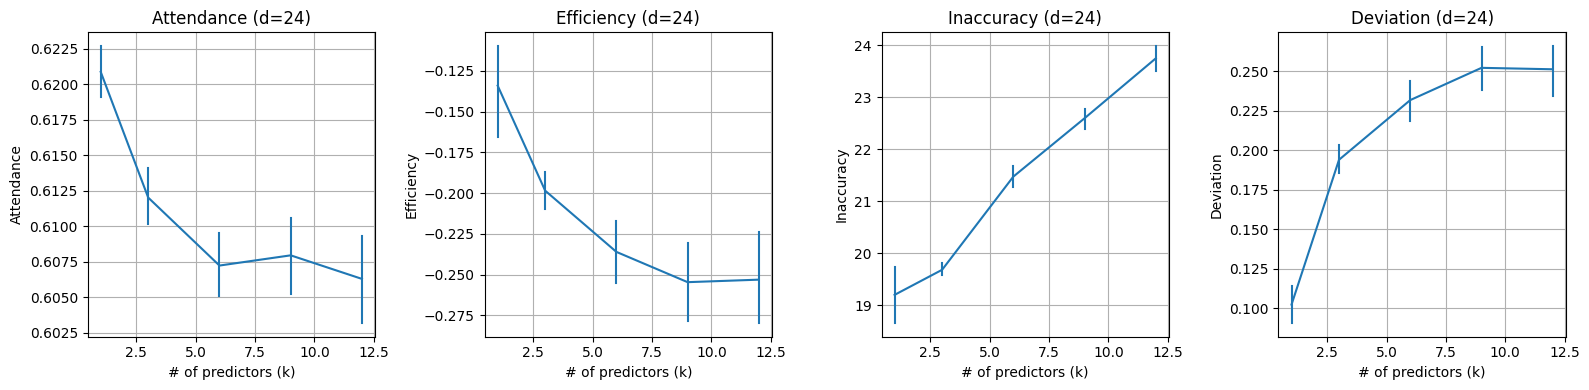

In [81]:
fig, ax = plt.subplots(
    1,4, 
    figsize=(16, 4), 
    tight_layout=True
)

variables = ['Attendance', 'Efficiency', 'Inaccuracy', 'Deviation']
d = ds[0]

for i, v in enumerate(variables):
    sns.lineplot(
        x='Num_predictors', y=v,
        data=df2C,
        ax=ax[i],
        err_style="bars",ci=95
    )
    ax[i].set_ylabel(v)
    ax[i].set_xlabel('# of predictors (k)')
    ax[i].set_title(f"{v} (d={d})")
    ax[i].grid()

In [82]:
file_name = PATHS['folder_figures_for_paper'] / 'Figure2.png'
fig.savefig(file_name, dpi=300, bbox_inches='tight')

---